In [29]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot
from sklearn.linear_model import LinearRegression 
import scipy
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [21]:
Whole18 = histplot.getData(18, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole19 = histplot.getData(19, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole20 = histplot.getData(20, direct, ASC, 1, 366, np.arange(3, 7), float)

In [23]:
print(Whole18.shape)
Whole18 = Whole18[~np.isnan(Whole18).any(axis = 1), :]
print(Whole18.shape)

(525589, 4)
(525562, 4)


In [24]:
print(Whole19.shape)
Whole19 = Whole19[~np.isnan(Whole19).any(axis = 1), :]
print(Whole19.shape)

(525586, 4)
(525563, 4)


In [25]:
print(Whole20.shape)
Whole20 = Whole20[~np.isnan(Whole20).any(axis = 1), :]
print(Whole20.shape)

(527016, 4)
(526973, 4)


Coefficients: 
 [-3.25277547e-05  1.36990815e-04 -1.46662515e-01]
Mean squared error: 0.00053
Coefficient of determination: 0.01


Text(0.5, 1.0, 'Linear Regression for Air Pressure and Precipitation')

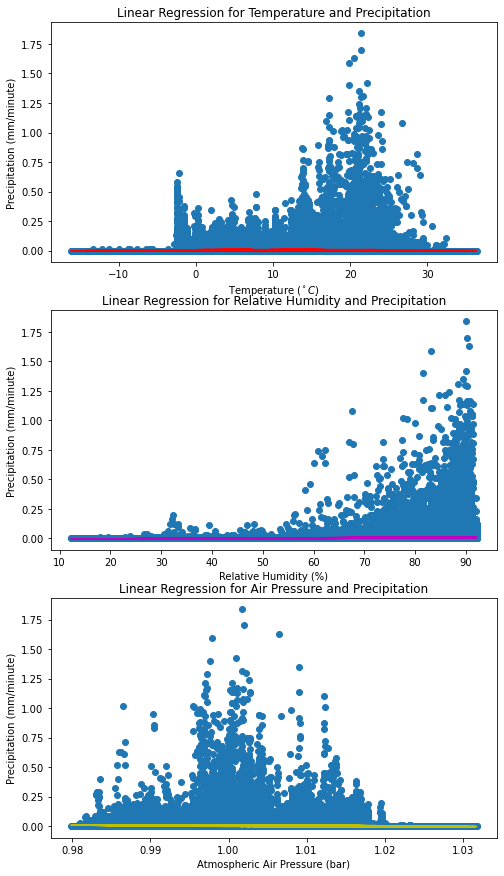

In [51]:
# This trains using a dataset, and uses that to predict the future! 
# Shows that its not particularly good. 
reg = LinearRegression()
reg.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
predict2019 = reg.predict(Whole19[:,np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.plot(Whole19[:, 0], predict2019, color = 'r')
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Linear Regression for Temperature and Precipitation')
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.5f'
     % mean_squared_error(Whole19[:, 3], predict2019))
print('Coefficient of determination: %.2f'
      % r2_score(Whole19[:,3], predict2019))
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.plot(Whole19[:, 1], predict2019, color = 'm')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Relative Humidity (%)')
plt.title('Linear Regression for Relative Humidity and Precipitation')

plt.subplot(3,1,3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.plot(Whole19[:, 2], predict2019, color = 'y')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.title('Linear Regression for Air Pressure and Precipitation')

In [34]:
# Try another approach! Decision Tree for example
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [38]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(Whole18[:, np.arange(0, 4)], np.arange(0, len(Whole18)))


KeyboardInterrupt: 

Text(0.5, 1.0, 'Decision Tree regression of Air Pressure and Precipitation')

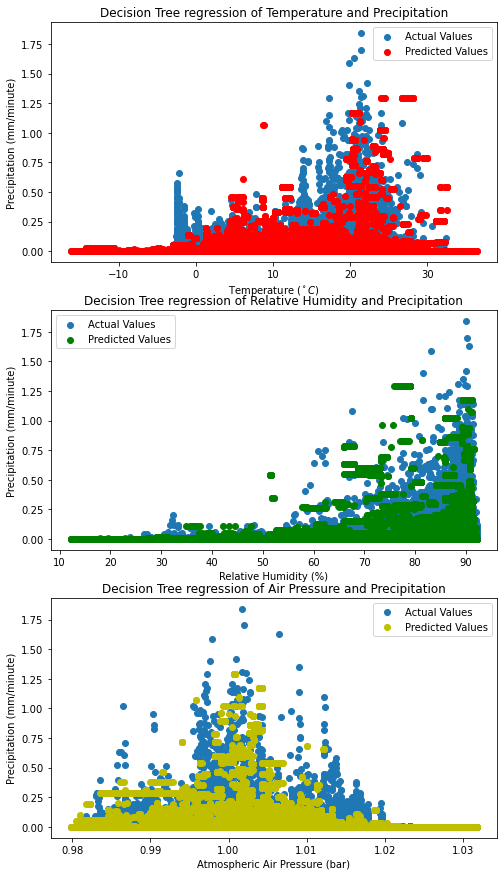

In [57]:
from sklearn.tree import DecisionTreeRegressor
newclf = DecisionTreeRegressor()
newclf = newclf.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
newpredict2019 = newclf.predict(Whole19[:, np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.scatter(Whole19[:,0], newpredict2019, color = 'r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Temperature and Precipitation')
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.scatter(Whole19[:,1], newpredict2019, color = 'g')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Relative Humidity and Precipitation')
plt.subplot(3, 1, 3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.scatter(Whole19[:,2], newpredict2019, color = 'y')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Air Pressure and Precipitation')